In [1]:
# Import required libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load the Data

In [2]:
# Load JSONL data
data = []
with open('data.jsonl', 'r') as f:
    for line in f:
        entry = json.loads(line)
        # Extract the nested 'data' field
        if 'data' in entry:
            data.append(entry['data'])
        else:
            data.append(entry)

df = pd.DataFrame(data)
print(f"Total number of posts: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

Total number of posts: 8799
Number of columns: 114


## 2. Data Structure Overview

In [3]:
# Display all column names
print("Available columns:")
print(df.columns.tolist())

Available columns:
['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'thumbnail_height', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'thumbnail_width', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftex

In [4]:
# Check data types and non-null counts
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Columns: 114 entries, approved_at_utc to link_flair_template_id
dtypes: bool(28), float64(7), int64(8), object(37), str(34)
memory usage: 6.0+ MB


In [5]:
# Display first few rows with key columns
key_columns = ['title', 'author', 'score', 'num_comments', 'subreddit', 'created_utc', 'is_self', 'over_18']
available_cols = [col for col in key_columns if col in df.columns]
df[available_cols].head(10)

,title,author,score,num_comments,subreddit,created_utc,is_self,over_18
0,What Are You Reading/Book Club Tuesday,AutoModerator,2,1,Anarchism,1.739858e+09,True,False
1,"""WTF is Social Ecology?"" by Usufruct Collective",NewMunicipalAgenda,48,2,Anarchism,1.739818e+09,False,False
2,Who do you think is the most powerful/popular anarch-nihilist ever?,Charming-Score7015,3,2,Anarchism,1.739757e+09,True,False
3,Not paying student loans or taxes,NoBackground7266,33,20,Anarchism,1.739816e+09,True,False
4,Recommendations for intellectual debate content,Jewstun,7,1,Anarchism,1.739811e+09,True,False
5,WE DONT WANT YOUR FUCKING WAR,Paczilla3,1032,8,Anarchism,1.739810e+09,False,False
6,Links between german and us anarchism,somber_autumn,16,6,Anarchism,1.739795e+09,True,False
7,Counter Protest TERFS in Brisbane QLD 10am 23rd February,Intanetwaifuu,100,5,Anarchism,1.739786e+09,False,False
8,"For Presidents Day, rather than celebrating George Washington, we invite you to learn about how ...",CrimethInc-Ex-Worker,319,10,Anarchism,1.739792e+09,False,False
9,Mutual Aid Monday,AutoModerator,9,0,Anarchism,1.739772e+09,True,False


## 3. Basic Statistics

In [6]:
# Numerical statistics
numeric_cols = ['score', 'num_comments', 'ups', 'downs', 'upvote_ratio']
available_numeric = [col for col in numeric_cols if col in df.columns]
df[available_numeric].describe()

,score,num_comments,ups,downs,upvote_ratio
count,8799.000000,8799.000000,8799.000000,8799.0,8799.000000
mean,388.866348,68.252756,388.866348,0.0,0.861548
std,1886.171342,424.405332,1886.171342,0.0,0.163544
min,0.000000,0.000000,0.000000,0.0,0.050000
25%,17.000000,3.000000,17.000000,0.0,0.810000
50%,62.000000,12.000000,62.000000,0.0,0.920000
75%,213.000000,43.000000,213.000000,0.0,0.970000
max,49905.000000,13242.000000,49905.000000,0.0,1.000000


In [7]:
# Subreddit distribution
if 'subreddit' in df.columns:
    print("Subreddit distribution:")
    print(df['subreddit'].value_counts())

Subreddit distribution:
subreddit
neoliberal             993
politics               993
worldpolitics          989
socialism              985
Liberal                984
Conservative           980
Anarchism              974
democrats              932
Republican             853
PoliticalDiscussion    116
Name: count, dtype: int64


## 4. Engagement Analysis

In [8]:
# Top posts by score
print("Top 10 posts by score:")
if 'score' in df.columns and 'title' in df.columns:
    top_posts = df.nlargest(10, 'score')[['title', 'score', 'num_comments', 'author']]
    display(top_posts)

Top 10 posts by score:


,title,score,num_comments,author
6656,Trump Fires Hundreds of Staff Overseeing Nuclear Weapons: Report,49905,4147,ClydeFrog1313
6069,Trump to Fire Hundreds From FAA Despite Four Deadly Crashes on His Watch,44467,2276,Quirkie
6328,‘We’ve been betrayed:’ Local veterans angry after being laid off by Trump administration,41400,2804,Rock-n-roll-Kevin
4601,This is the correct response to Trump’s reaction to recent tragedy,40990,1276,HazyDavey68
6508,"Trump officials fired nuclear staff not realizing they oversee the country’s weapons stockpile, ...",38220,2119,Optimal-Kitchen6308
6782,"Nazi flags can fly in Utah schools, but not pride flags, GOP lawmaker says",35861,1573,PrithvinathReddy
5994,Elon Musk Says Team Behind CBS's '60 Minutes' Deserves 'A Long Prison Sentence',33932,2657,ObjectiveAd6551
6396,RFK Jr. is already taking aim at anti-depressants,33656,5692,ReaderBeeRottweiler
6275,Elon Musk is doing everything conspiracy theorists accuse George Soros of,33286,918,z8675309z
4835,Conservatives want a Reddit safe space,32693,2233,PM-ME-SMILES-PLZ


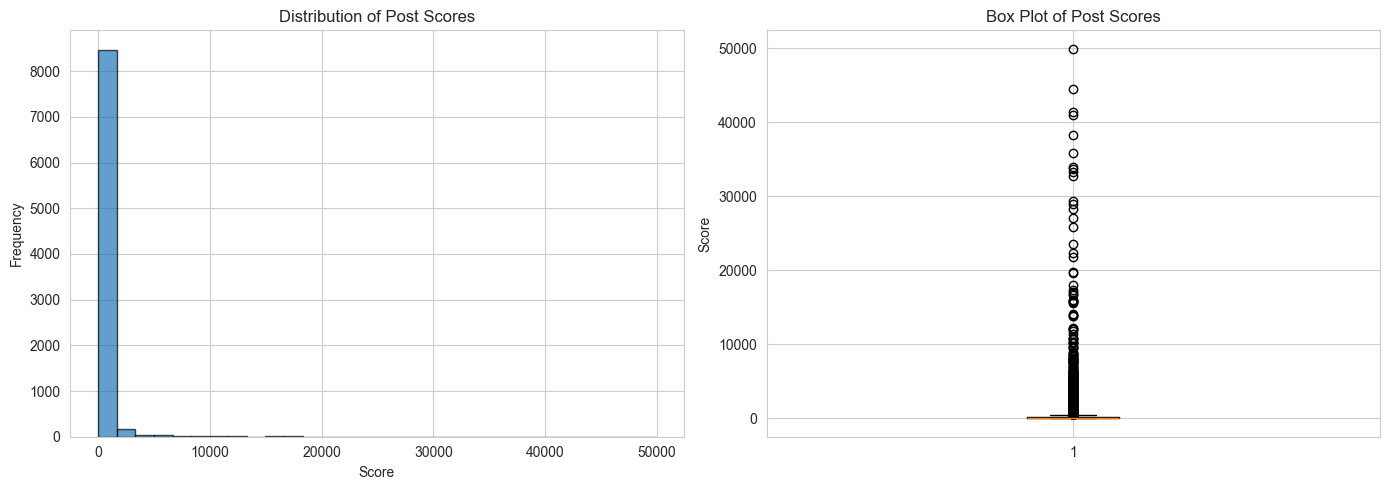

In [9]:
# Score distribution
if 'score' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(df['score'], bins=30, edgecolor='black', alpha=0.7)
    axes[0].set_xlabel('Score')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of Post Scores')
    
    # Box plot
    axes[1].boxplot(df['score'])
    axes[1].set_ylabel('Score')
    axes[1].set_title('Box Plot of Post Scores')
    
    plt.tight_layout()
    plt.show()

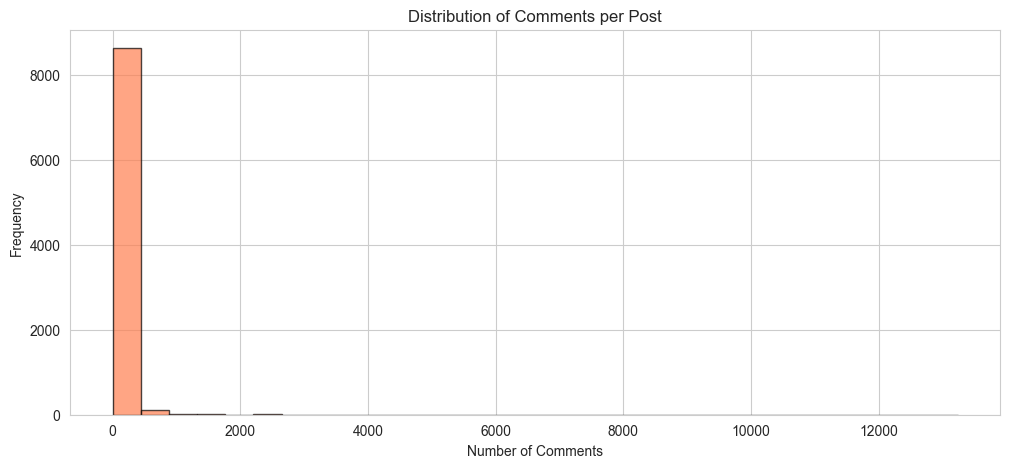

In [10]:
# Comments distribution
if 'num_comments' in df.columns:
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.hist(df['num_comments'], bins=30, edgecolor='black', alpha=0.7, color='coral')
    ax.set_xlabel('Number of Comments')
    ax.set_ylabel('Frequency')
    ax.set_title('Distribution of Comments per Post')
    plt.show()

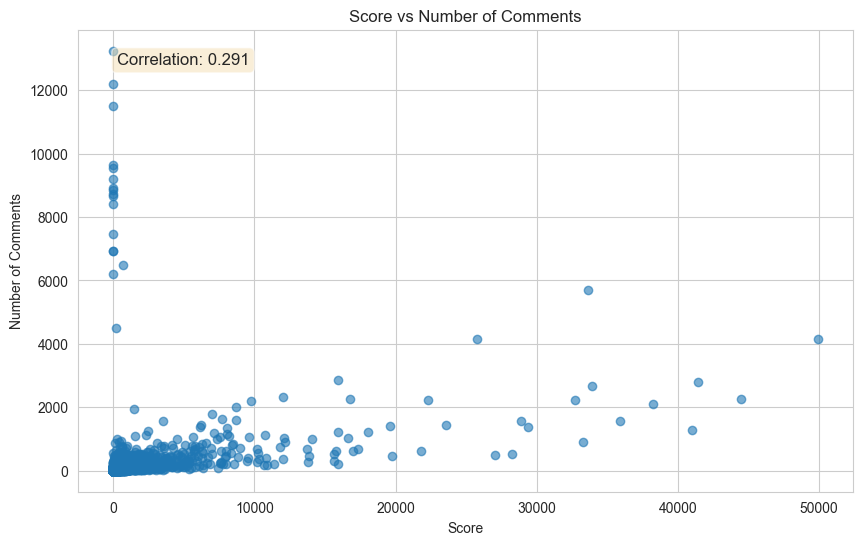

In [11]:
# Score vs Comments correlation
if 'score' in df.columns and 'num_comments' in df.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df['score'], df['num_comments'], alpha=0.6)
    ax.set_xlabel('Score')
    ax.set_ylabel('Number of Comments')
    ax.set_title('Score vs Number of Comments')
    
    # Calculate correlation
    correlation = df['score'].corr(df['num_comments'])
    ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.show()

Original data points: 8799, After removing outliers: 5840 (66.4%)


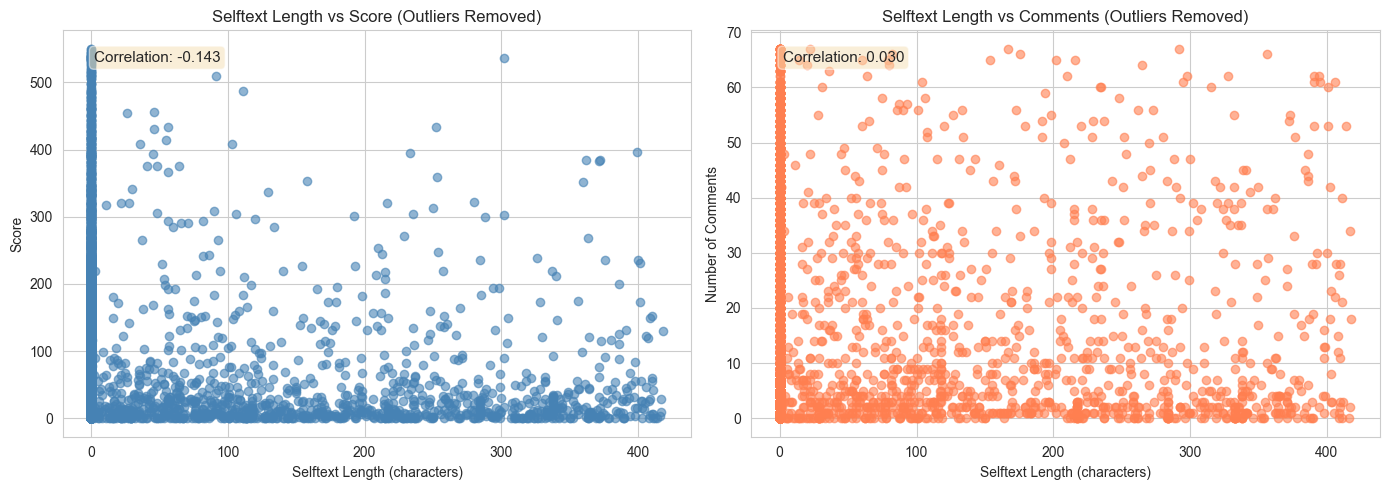

In [23]:
# Selftext length vs Score and vs Comments (outliers removed)
if 'selftext' in df.columns and 'score' in df.columns and 'num_comments' in df.columns:
    # Calculate selftext length
    df['selftext_length'] = df['selftext'].fillna('').apply(len)
    
    # Remove outliers using IQR method
    def remove_outliers(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # Filter outliers for each variable
    df_filtered = df.copy()
    df_filtered = remove_outliers(df_filtered, 'selftext_length')
    df_filtered = remove_outliers(df_filtered, 'score')
    df_filtered = remove_outliers(df_filtered, 'num_comments')
    
    print(f"Original data points: {len(df)}, After removing outliers: {len(df_filtered)} ({len(df_filtered)/len(df)*100:.1f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Selftext length vs Score
    axes[0].scatter(df_filtered['selftext_length'], df_filtered['score'], alpha=0.6, color='steelblue')
    axes[0].set_xlabel('Selftext Length (characters)')
    axes[0].set_ylabel('Score')
    axes[0].set_title('Selftext Length vs Score (Outliers Removed)')
    corr_score = df_filtered['selftext_length'].corr(df_filtered['score'])
    axes[0].text(0.05, 0.95, f'Correlation: {corr_score:.3f}', 
                 transform=axes[0].transAxes, fontsize=11, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Selftext length vs Comments
    axes[1].scatter(df_filtered['selftext_length'], df_filtered['num_comments'], alpha=0.6, color='coral')
    axes[1].set_xlabel('Selftext Length (characters)')
    axes[1].set_ylabel('Number of Comments')
    axes[1].set_title('Selftext Length vs Comments (Outliers Removed)')
    corr_comments = df_filtered['selftext_length'].corr(df_filtered['num_comments'])
    axes[1].text(0.05, 0.95, f'Correlation: {corr_comments:.3f}', 
                 transform=axes[1].transAxes, fontsize=11, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

Posts mentioning 'trump': 2343 out of 8799 total posts (26.6%)


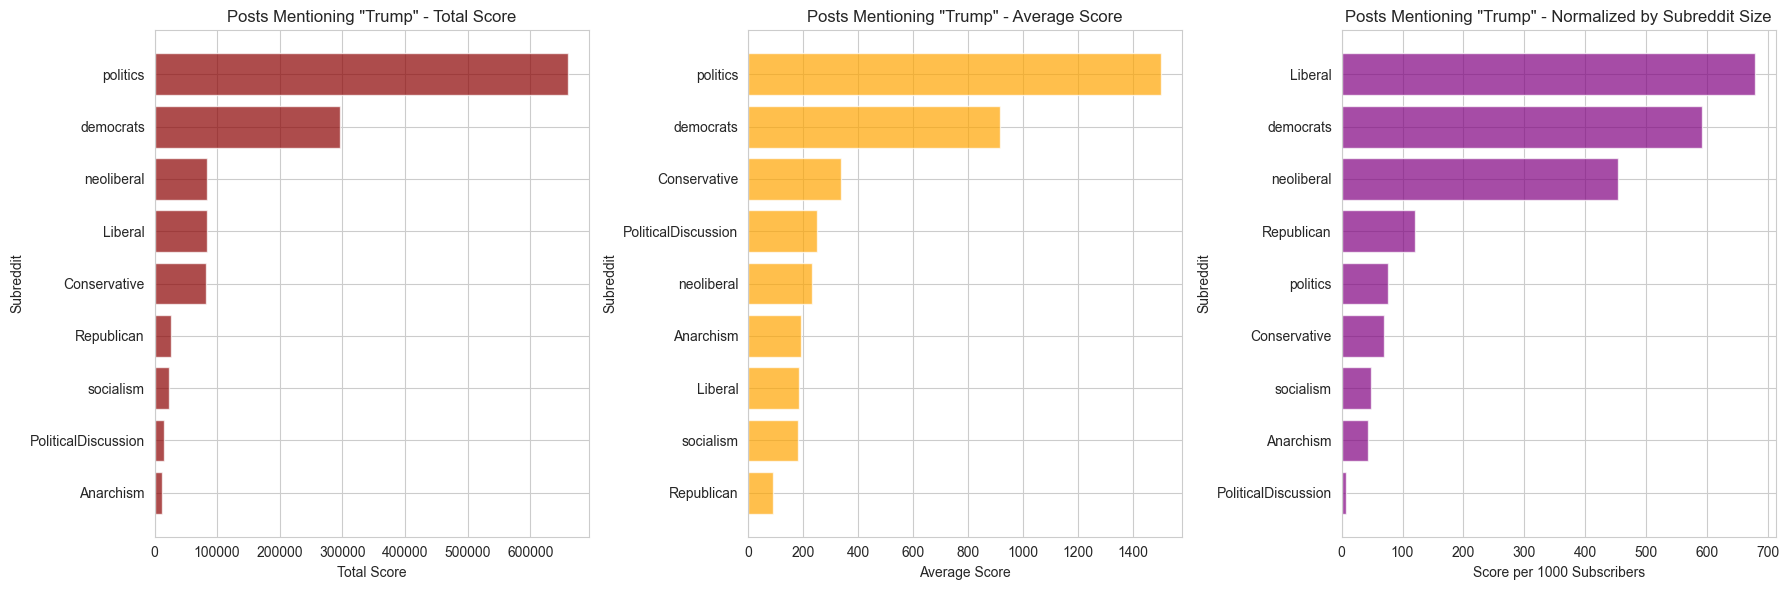


Detailed breakdown (sorted by normalized score):


,subreddit,total_score,avg_score,post_count,subscribers,normalized_score
2,Liberal,83283,185.485523,449,122721,678.636908
5,democrats,295405,914.566563,323,499100,591.875376
6,neoliberal,84437,233.897507,361,186235,453.389535
4,Republican,25512,91.440860,279,210930,120.950078
7,politics,660084,1503.608200,439,8740825,75.517357
1,Conservative,82978,338.685714,245,1200167,69.138712
8,socialism,22660,182.741935,124,467052,48.517082
0,Anarchism,11721,192.147541,61,275979,42.470623
3,PoliticalDiscussion,15565,251.048387,62,2184957,7.123710


In [25]:
# Posts containing "trump" - Score by Subreddit (normalized by subreddit size)
if 'title' in df.columns and 'selftext' in df.columns and 'score' in df.columns and 'subreddit' in df.columns:
    # Filter posts containing "trump" in title or selftext (case insensitive)
    trump_mask = (
        df['title'].str.lower().str.contains('trump', na=False) | 
        df['selftext'].fillna('').str.lower().str.contains('trump', na=False)
    )
    trump_posts = df[trump_mask]
    
    print(f"Posts mentioning 'trump': {len(trump_posts)} out of {len(df)} total posts ({len(trump_posts)/len(df)*100:.1f}%)")
    
    if len(trump_posts) > 0:
        # Group by subreddit and aggregate, including subscriber count for normalization
        trump_by_subreddit = trump_posts.groupby('subreddit').agg({
            'score': ['sum', 'mean', 'count'],
            'subreddit_subscribers': 'first'  # Get subscriber count
        }).reset_index()
        trump_by_subreddit.columns = ['subreddit', 'total_score', 'avg_score', 'post_count', 'subscribers']
        
        # Normalize score by subreddit size (score per 1000 subscribers)
        trump_by_subreddit['normalized_score'] = (trump_by_subreddit['total_score'] / trump_by_subreddit['subscribers']) * 1000
        trump_by_subreddit = trump_by_subreddit.sort_values('normalized_score', ascending=True)
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        # Total score by subreddit
        data_sorted = trump_by_subreddit.sort_values('total_score', ascending=True)
        axes[0].barh(data_sorted['subreddit'], data_sorted['total_score'], color='darkred', alpha=0.7)
        axes[0].set_xlabel('Total Score')
        axes[0].set_ylabel('Subreddit')
        axes[0].set_title('Posts Mentioning "Trump" - Total Score')
        
        # Average score by subreddit
        data_sorted = trump_by_subreddit.sort_values('avg_score', ascending=True)
        axes[1].barh(data_sorted['subreddit'], data_sorted['avg_score'], color='orange', alpha=0.7)
        axes[1].set_xlabel('Average Score')
        axes[1].set_ylabel('Subreddit')
        axes[1].set_title('Posts Mentioning "Trump" - Average Score')
        
        # Normalized score by subreddit (per 1000 subscribers)
        data_sorted = trump_by_subreddit.sort_values('normalized_score', ascending=True)
        axes[2].barh(data_sorted['subreddit'], data_sorted['normalized_score'], color='purple', alpha=0.7)
        axes[2].set_xlabel('Score per 1000 Subscribers')
        axes[2].set_ylabel('Subreddit')
        axes[2].set_title('Posts Mentioning "Trump" - Normalized by Subreddit Size')
        
        plt.tight_layout()
        plt.show()
        
        # Show detailed breakdown
        print("\nDetailed breakdown (sorted by normalized score):")
        display(trump_by_subreddit[['subreddit', 'total_score', 'avg_score', 'post_count', 'subscribers', 'normalized_score']].sort_values('normalized_score', ascending=False))
    else:
        print("No posts mentioning 'trump' found in the dataset.")

## 5. Author Analysis

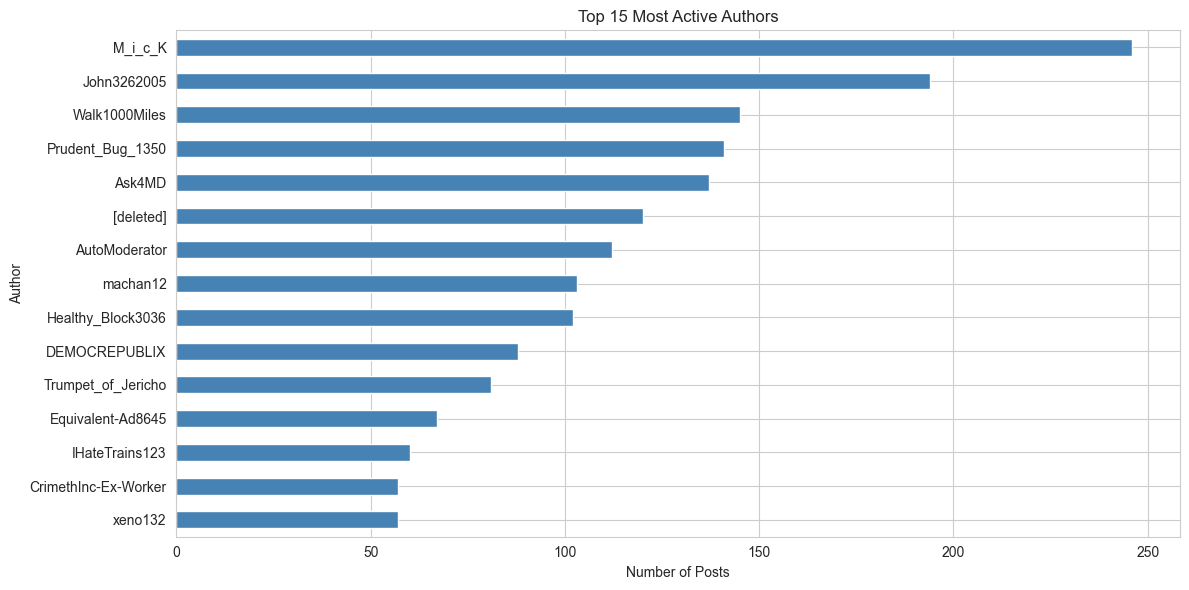


Total unique authors: 3599


In [12]:
# Most active authors
if 'author' in df.columns:
    author_counts = df['author'].value_counts().head(15)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    author_counts.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_xlabel('Number of Posts')
    ax.set_ylabel('Author')
    ax.set_title('Top 15 Most Active Authors')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal unique authors: {df['author'].nunique()}")

## 6. Content Type Analysis

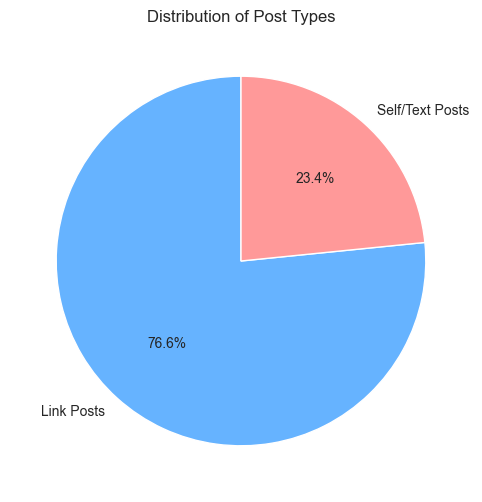

In [13]:
# Self posts vs link posts
if 'is_self' in df.columns:
    self_counts = df['is_self'].value_counts()
    
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = ['#66b3ff', '#ff9999']
    labels = ['Link Posts', 'Self/Text Posts']
    ax.pie(self_counts.values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title('Distribution of Post Types')
    plt.show()

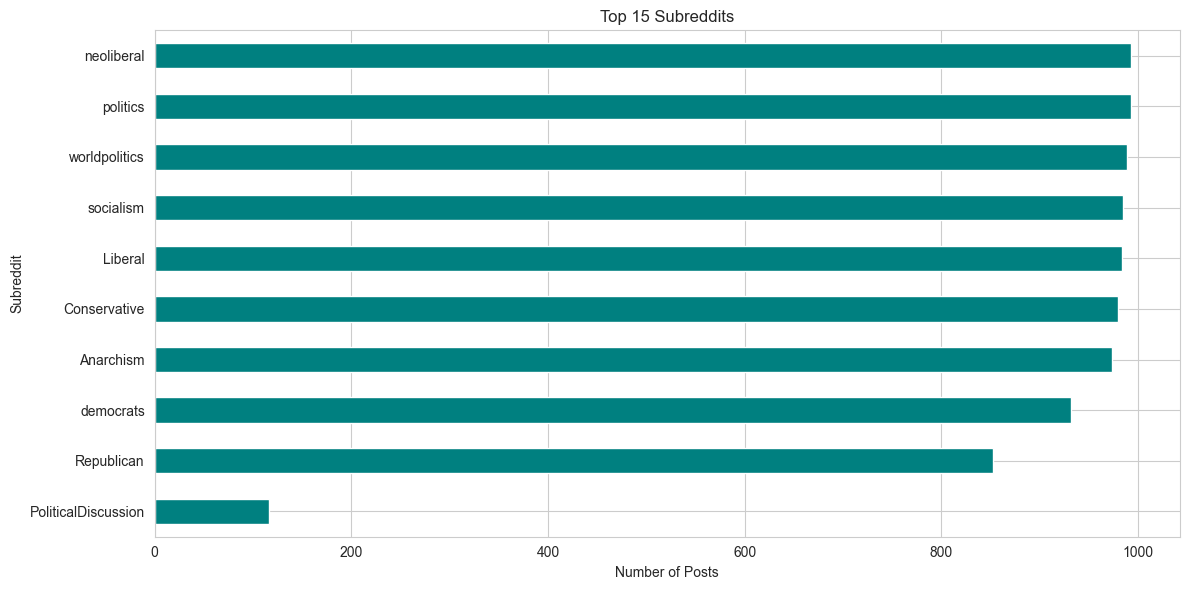

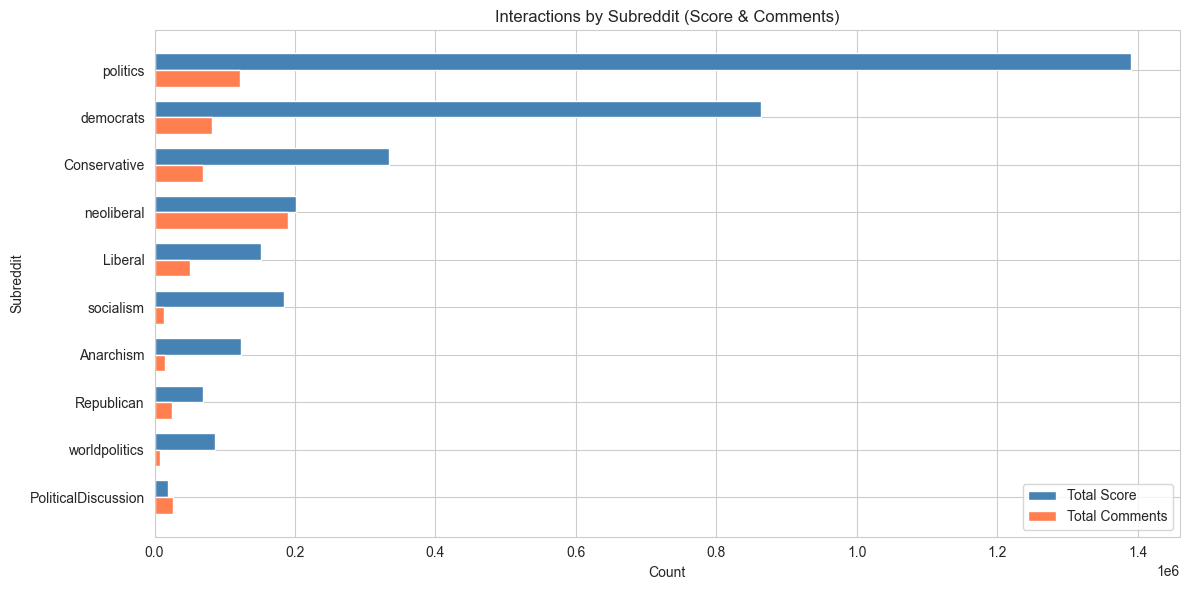

In [20]:
# Subreddit analysis for link posts
if 'subreddit' in df.columns:
    subreddit_counts = df['subreddit'].value_counts().head(15)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    subreddit_counts.plot(kind='barh', ax=ax, color='teal')
    ax.set_xlabel('Number of Posts')
    ax.set_ylabel('Subreddit')
    ax.set_title('Top 15 Subreddits')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

# Interactions by subreddit (score + comments)
if 'subreddit' in df.columns and 'score' in df.columns and 'num_comments' in df.columns:
    # Aggregate interactions by subreddit
    subreddit_interactions = df.groupby('subreddit').agg({
        'score': 'sum',
        'num_comments': 'sum'
    }).reset_index()
    subreddit_interactions['total_interactions'] = subreddit_interactions['score'] + subreddit_interactions['num_comments']
    subreddit_interactions = subreddit_interactions.nlargest(15, 'total_interactions')
    
    fig, ax = plt.subplots(figsize=(12, 6))
    x = range(len(subreddit_interactions))
    width = 0.35
    
    bars1 = ax.barh([i - width/2 for i in x], subreddit_interactions['score'], width, label='Total Score', color='steelblue')
    bars2 = ax.barh([i + width/2 for i in x], subreddit_interactions['num_comments'], width, label='Total Comments', color='coral')
    
    ax.set_yticks(x)
    ax.set_yticklabels(subreddit_interactions['subreddit'])
    ax.set_xlabel('Count')
    ax.set_ylabel('Subreddit')
    ax.set_title('Interactions by Subreddit (Score & Comments)')
    ax.legend()
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

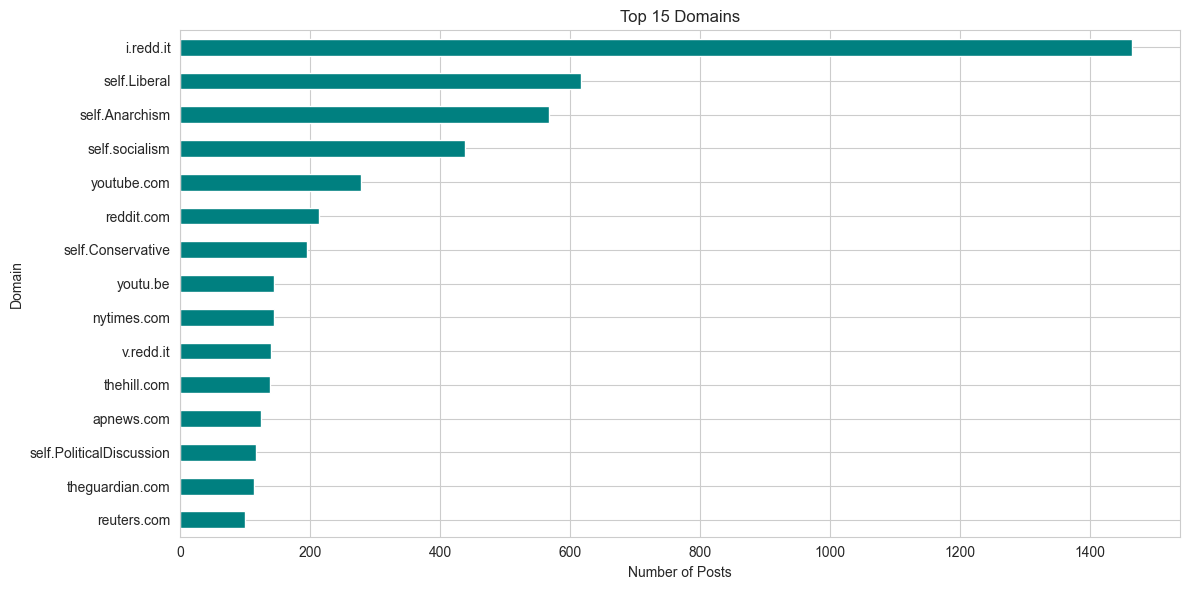

In [ ]:
# Domain analysis for link posts
if 'domain' in df.columns:
    domain_counts = df['domain'].value_counts().head(15)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    domain_counts.plot(kind='barh', ax=ax, color='teal')
    ax.set_xlabel('Number of Posts')
    ax.set_ylabel('Domain')
    ax.set_title('Top 15 Domains')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

## 7. Temporal Analysis

In [15]:
# Convert timestamps and analyze posting times
if 'created_utc' in df.columns:
    df['created_datetime'] = pd.to_datetime(df['created_utc'], unit='s')
    df['hour'] = df['created_datetime'].dt.hour
    df['day_of_week'] = df['created_datetime'].dt.day_name()
    df['date'] = df['created_datetime'].dt.date
    
    print(f"Date range: {df['created_datetime'].min()} to {df['created_datetime'].max()}")

Date range: 2024-07-23 20:39:04 to 2025-02-18 11:45:33


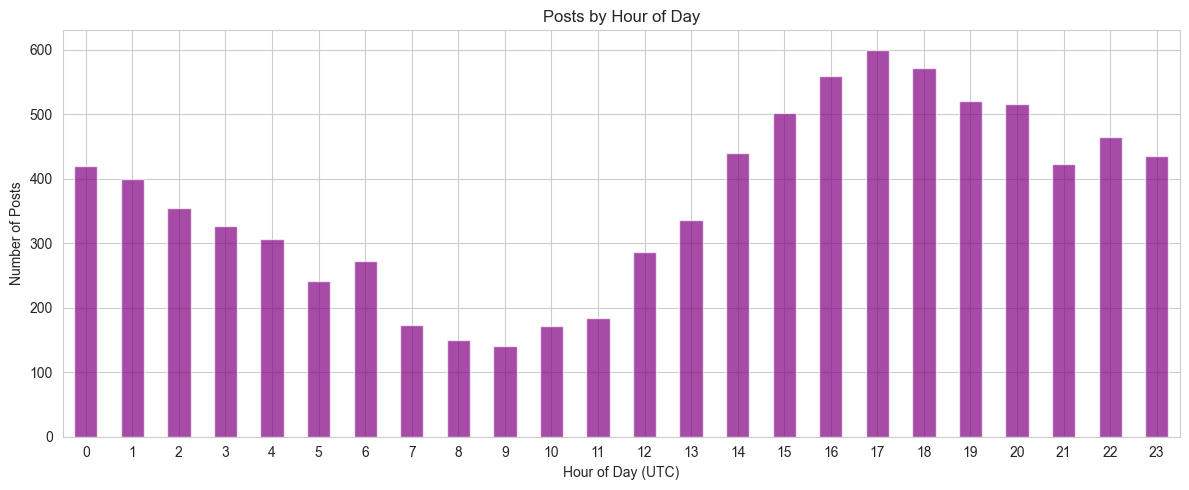

In [16]:
# Hourly posting distribution
if 'hour' in df.columns:
    fig, ax = plt.subplots(figsize=(12, 5))
    df['hour'].value_counts().sort_index().plot(kind='bar', ax=ax, color='purple', alpha=0.7)
    ax.set_xlabel('Hour of Day (UTC)')
    ax.set_ylabel('Number of Posts')
    ax.set_title('Posts by Hour of Day')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

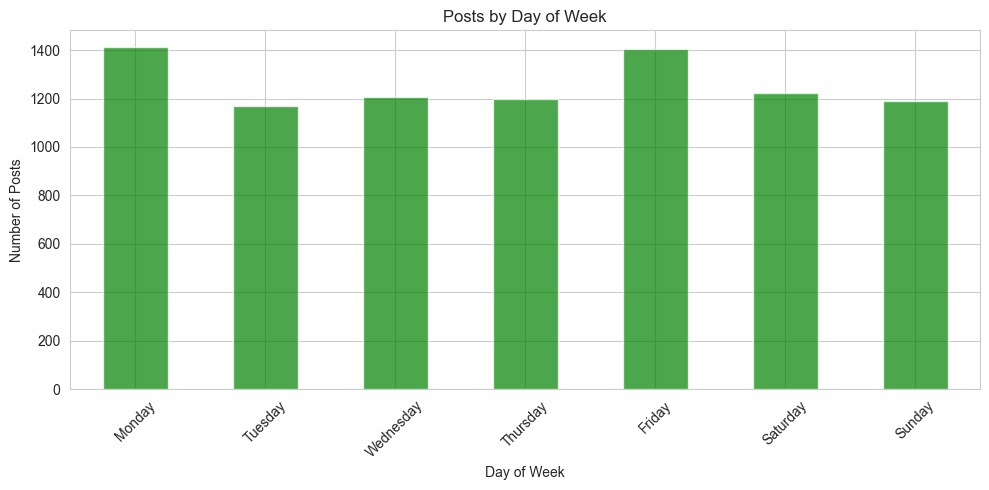

In [17]:
# Day of week distribution
if 'day_of_week' in df.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['day_of_week'].value_counts().reindex(day_order)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    day_counts.plot(kind='bar', ax=ax, color='green', alpha=0.7)
    ax.set_xlabel('Day of Week')
    ax.set_ylabel('Number of Posts')
    ax.set_title('Posts by Day of Week')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 8. Summary Statistics

In [18]:
# Create a summary
summary = {
    'Total Posts': len(df),
    'Unique Authors': df['author'].nunique() if 'author' in df.columns else 'N/A',
    'Average Score': df['score'].mean() if 'score' in df.columns else 'N/A',
    'Median Score': df['score'].median() if 'score' in df.columns else 'N/A',
    'Max Score': df['score'].max() if 'score' in df.columns else 'N/A',
    'Average Comments': df['num_comments'].mean() if 'num_comments' in df.columns else 'N/A',
    'Total Comments': df['num_comments'].sum() if 'num_comments' in df.columns else 'N/A',
    'Self Posts (%)': (df['is_self'].sum() / len(df) * 100) if 'is_self' in df.columns else 'N/A',
}

print("=" * 50)
print("           DATASET SUMMARY")
print("=" * 50)
for key, value in summary.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")
print("=" * 50)

           DATASET SUMMARY
Total Posts: 8799
Unique Authors: 3599
Average Score: 388.87
Median Score: 62.00
Max Score: 49905
Average Comments: 68.25
Total Comments: 600556
Self Posts (%): 23.40
